In [1]:
import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE')
from MPRA_exp.MPRA_predict.utils import *

In [11]:
# filepath = '../../data/SirajMPRA/SirajMPRA_281k_fold_change_new.csv'
# df = pd.read_csv(filepath)
# df = df.rename(columns={col: col.replace('SKNSH', 'SK-N-SH') for col in df.columns})
# df.to_csv(filepath, index=False)

In [17]:
df_1 = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_fold_change_new.csv')
df_1

,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,...,A549_H3K36me3_fold_change,A549_CTCF_fold_change,HCT116_DNase_fold_change,HCT116_H3K4me1_fold_change,HCT116_H3K4me3_fold_change,HCT116_H3K9me3_fold_change,HCT116_H3K27me3_fold_change,HCT116_H3K27ac_fold_change,HCT116_H3K36me3_fold_change,HCT116_CTCF_fold_change
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,NaN,0.457744,0.038850,0.134813,0.196412,0.372905,0.290345,0.144329,0.239078,0.000000
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,NaN,0.788992,0.000000,0.872095,0.096383,0.000000,0.472053,0.000000,0.155004,0.529594
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,NaN,0.459888,0.014569,0.607107,0.039964,0.035034,0.813397,0.000000,0.303930,0.000000
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,NaN,1.365723,0.000000,0.185040,0.393819,0.642425,0.000000,0.000000,0.075983,0.111116
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,NaN,1.284249,0.017321,0.291591,0.467881,0.256954,0.000000,0.912380,0.000000,0.757369
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,NaN,0.925136,0.000000,0.426245,0.235080,0.488252,0.505740,0.110835,0.164122,0.111116
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,NaN,0.231552,0.061836,0.395381,0.210420,1.337411,1.130898,0.318047,0.037991,0.094654


In [18]:
df_2 = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_pred.csv')
df_2

,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,...,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit,flag
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789,True
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042,True
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061,True
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-9.422236,-7.347300,-8.694691,-9.359782,-5.428939,-6.522037,-9.115440,-11.068689,-9.575661,True
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-8.141296,-6.796749,-8.496226,-8.733803,-5.545477,-6.327884,-9.130206,-9.962906,-8.654516,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-6.511399,-6.431361,-7.430185,-8.173793,-5.671370,-6.129188,-8.043088,-9.617792,-7.009111,True
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.056848,-0.772791,-4.967724,-5.641770,-6.566808,-6.260857,-6.482600,-8.868452,-0.263586,True
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-5.489334,-4.034711,-4.979386,-6.015636,-6.284647,-6.169166,-6.730436,-8.404432,-6.365997,True
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767,True


In [19]:
df = pd.concat([df_1, df_2], axis=1)
df = df.loc[:, ~df.columns.duplicated()]
df

,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,...,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit,flag
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789,True
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042,True
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061,True
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-9.422236,-7.347300,-8.694691,-9.359782,-5.428939,-6.522037,-9.115440,-11.068689,-9.575661,True
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-8.141296,-6.796749,-8.496226,-8.733803,-5.545477,-6.327884,-9.130206,-9.962906,-8.654516,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-6.511399,-6.431361,-7.430185,-8.173793,-5.671370,-6.129188,-8.043088,-9.617792,-7.009111,True
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.056848,-0.772791,-4.967724,-5.641770,-6.566808,-6.260857,-6.482600,-8.868452,-0.263586,True
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-5.489334,-4.034711,-4.979386,-6.015636,-6.284647,-6.169166,-6.730436,-8.404432,-6.365997,True
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767,True


In [20]:
df.columns

Index(['seq', 'A549', 'HepG2', 'K562', 'SK-N-SH', 'HCT116', 'is_ref', 'chr',
       'pos', 'ref', 'alt', 'hg38_pos', 'HepG2_DNase_fold_change',
       'HepG2_H3K4me1_fold_change', 'HepG2_H3K4me3_fold_change',
       'HepG2_H3K9me3_fold_change', 'HepG2_H3K27me3_fold_change',
       'HepG2_H3K27ac_fold_change', 'HepG2_H3K36me3_fold_change',
       'HepG2_CTCF_fold_change', 'K562_DNase_fold_change',
       'K562_H3K4me1_fold_change', 'K562_H3K4me3_fold_change',
       'K562_H3K9me3_fold_change', 'K562_H3K27me3_fold_change',
       'K562_H3K27ac_fold_change', 'K562_H3K36me3_fold_change',
       'K562_CTCF_fold_change', 'SK-N-SH_DNase_fold_change',
       'SK-N-SH_H3K4me1_fold_change', 'SK-N-SH_H3K4me3_fold_change',
       'SK-N-SH_H3K9me3_fold_change', 'SK-N-SH_H3K27me3_fold_change',
       'SK-N-SH_H3K27ac_fold_change', 'SK-N-SH_H3K36me3_fold_change',
       'SK-N-SH_CTCF_fold_change', 'A549_DNase_fold_change',
       'A549_H3K4me1_fold_change', 'A549_H3K4me3_fold_change',
       'A549_H3

/tmp/ipykernel_19081/3781776180.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type, bw_adjust=2)


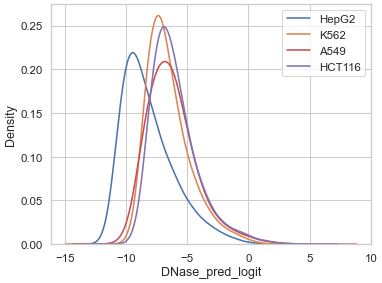

/tmp/ipykernel_19081/3781776180.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type, bw_adjust=2)


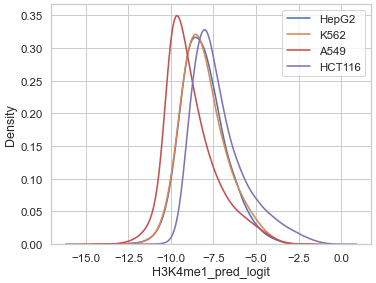

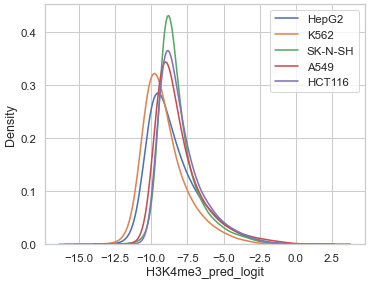

/tmp/ipykernel_19081/3781776180.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type, bw_adjust=2)


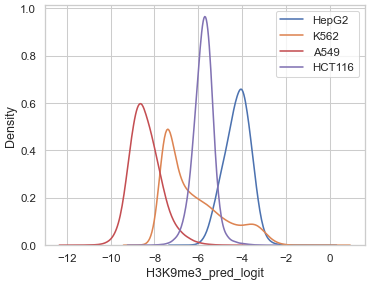

/tmp/ipykernel_19081/3781776180.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type, bw_adjust=2)


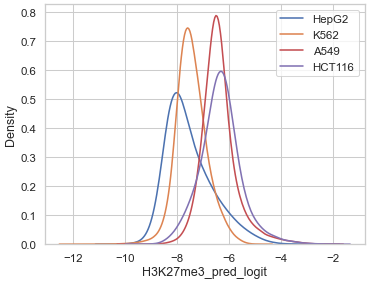

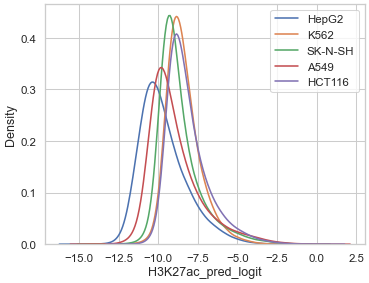

/tmp/ipykernel_19081/3781776180.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type, bw_adjust=2)


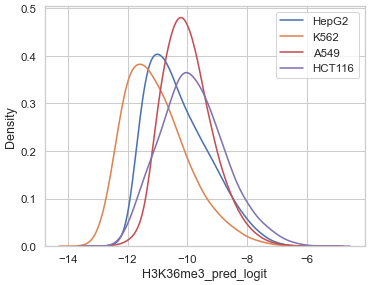

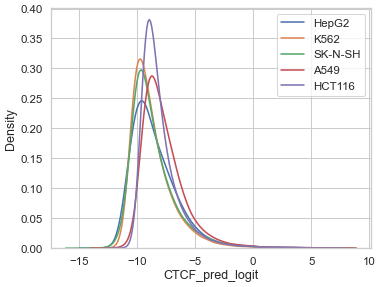

In [21]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = df[f'{cell_type}_{assay}_pred_logit'].copy()
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlabel(f'{assay}_pred_logit')
    plt.legend()
    plt.savefig(f'../figures/{assay}_pred_logit_kde.png', dpi=200)
    plt.show()

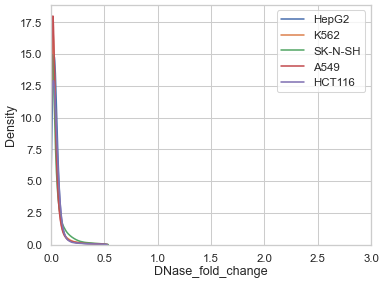

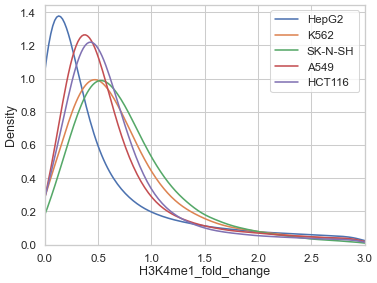

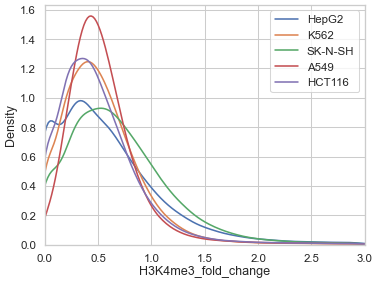

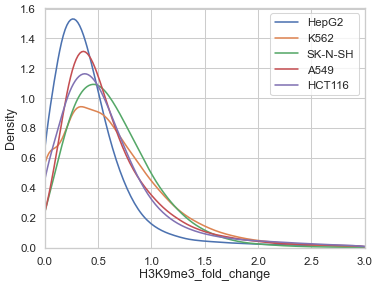

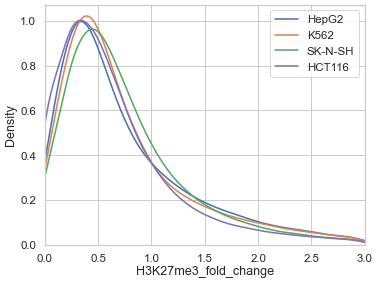

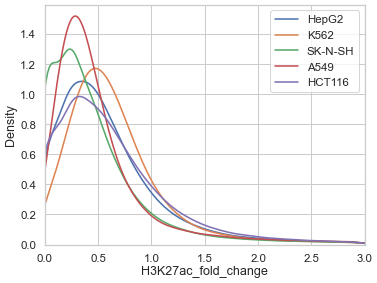

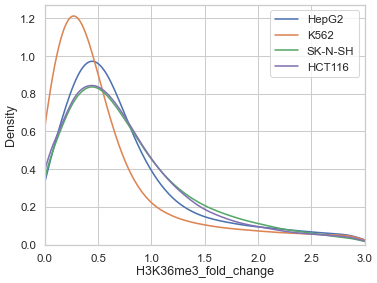

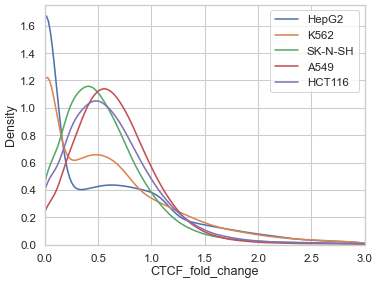

In [8]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

assays = ['DNase']
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = df[f'{cell_type}_{assay}_fold_change'].copy()
        x = x[x<0.5]
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlim(0, 0.5)
    plt.xlabel(f'{assay}_fold_change')
    plt.legend()
    plt.savefig(f'figures/{assay}_fold_change_kde.png', dpi=200)
    plt.show()

assays = ['H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = df[f'{cell_type}_{assay}_fold_change'].copy()
        x = x[x<3]
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlim(0, 3)
    plt.xlabel(f'{assay}_fold_change')
    plt.legend()
    plt.savefig(f'figures/{assay}_fold_change_kde.png', dpi=200)
    plt.show()

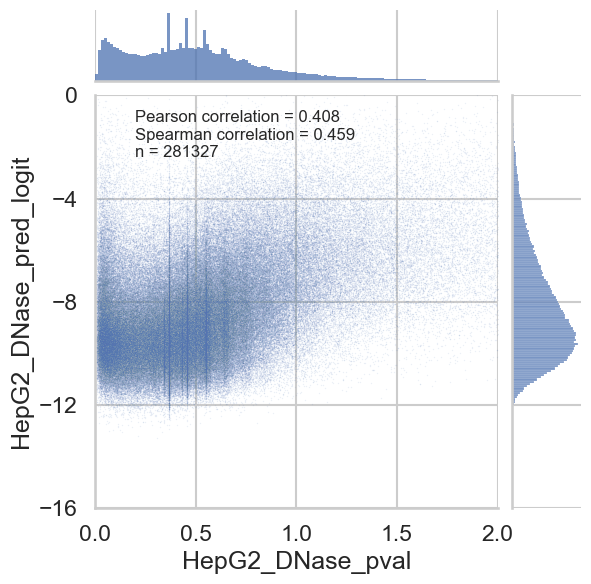

In [16]:
x = df['HepG2_DNase_fold_change']
y = df['HepG2_DNase_pred_logit']

# mask = x > 0.5
# x = x[mask]
# y = y[mask]

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_fold_change')
plt.ylabel('HepG2_DNase_pred_logit')
plt.xlim(0, 2)
plt.ylim(-16, 0)
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(-16, 0.1, 4))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )

plt.savefig('figures/scatter/HepG2_DNase_fold_change_vs_HepG2_DNase_pred_logit.png', dpi=200)
plt.show()

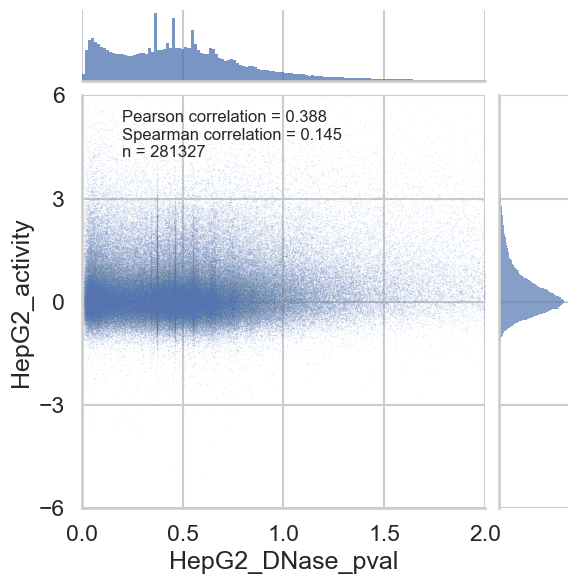

In [17]:
x = df['HepG2_DNase_fold_change']
y = df['HepG2']

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_fold_change')
plt.ylabel('HepG2_activity')
plt.xlim(0, 2)
plt.ylim(-6, 6)
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(-6, 6.1, 3))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )
plt.savefig('figures/scatter/HepG2_DNase_fold_change_vs_HepG2_activity.png', dpi=200)
plt.show()

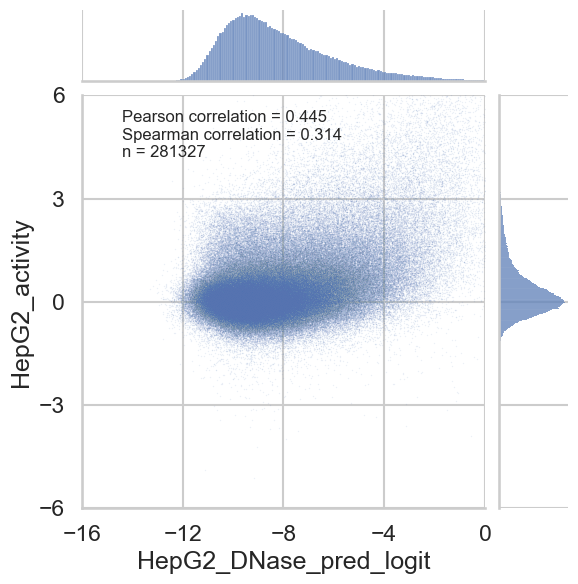

In [18]:
x = df['HepG2_DNase_pred_logit']
y = df['HepG2']

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_pred_logit')
plt.ylabel('HepG2_activity')
plt.xlim(-16, 0)
plt.ylim(-6, 6)
plt.xticks(np.arange(-16, 0.1, 4))
plt.yticks(np.arange(-6, 6.1, 3))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )
plt.savefig('figures/scatter/HepG2_DNase_pred_logit_vs_HepG2_activity.png', dpi=200)
plt.show()

In [ ]:
# x = np.log2(df['HepG2_DNase_pred_logit'] + 0.1)
# y = df['HepG2']

# r1 = pearson(x=x, y=y)
# r2 = spearman(x=x, y=y)

# g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
# plt.xlabel('HepG2_DNase_pred_logit')
# plt.ylabel('HepG2_activity')
# plt.xlim(-16, 0)
# plt.ylim(-6, 6)
# plt.xticks(np.arange(-16, 0.1, 4))
# plt.yticks(np.arange(-6, 6.1, 3))
# plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
#          s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )
# plt.savefig('figures/scatter/HepG2_DNase_pred_logit_vs_HepG2_activity.png', dpi=200)
# plt.show()

In [19]:
cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

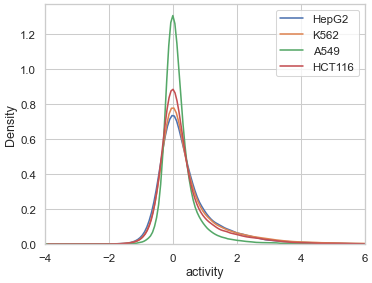

In [28]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
for cell_type in cell_types:
    y = df[cell_type]
    sns.kdeplot(y, label=cell_type)
plt.xlim(-4, 6)
plt.xlabel('activity')
plt.legend()
plt.savefig(f'figures/activity_kde.png', dpi=200)
plt.show()

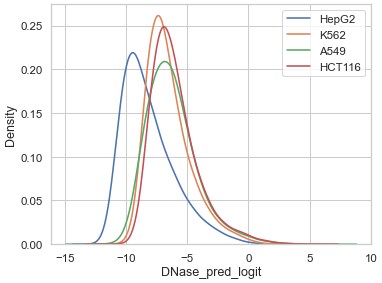

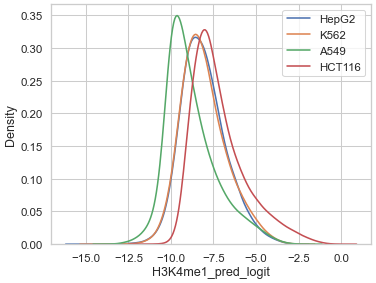

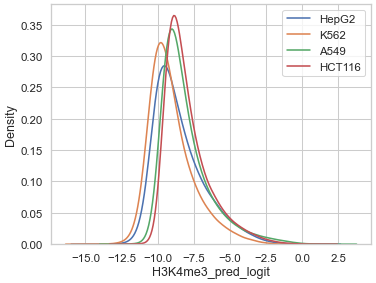

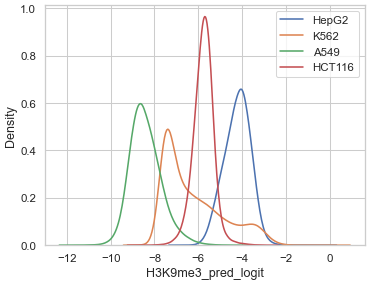

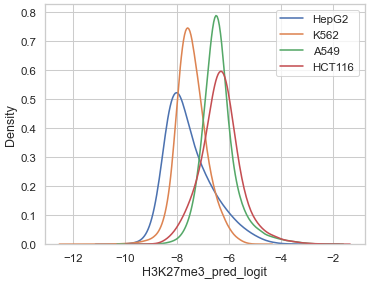

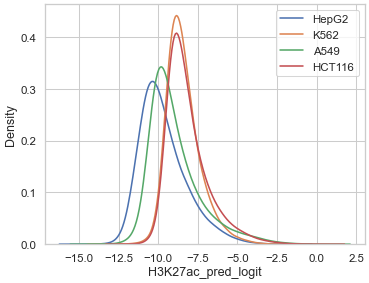

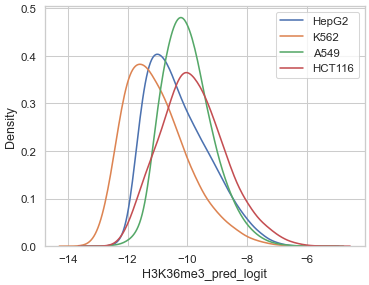

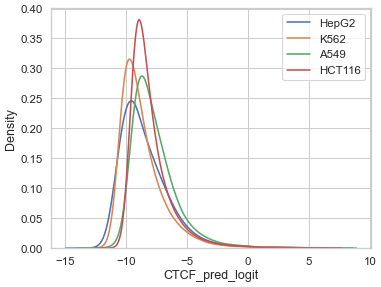

In [59]:
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = df[f'{cell_type}_{assay}_pred_logit'].copy()
        sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlabel(f'{assay}_pred_logit')
    plt.legend()
    plt.savefig(f'figures/{assay}_pred_logit_kde.png', dpi=200)
    plt.show()

In [20]:
main_df = df.copy()

data_split_dict = {}
data_split_dict['total'] = np.ones(len(main_df), dtype=bool)
data_split_dict['chrom'] = main_df['chr'].isin([f'chr{i}' for i in range(1, 23)])
data_split_dict['train'] = main_df['chr'].isin([f'chr{i}' for i in range(3, 23)])
data_split_dict['valid'] = main_df['chr'].isin(['chr1'])
data_split_dict['test'] = main_df['chr'].isin(['chr2'])
data_split_dict['designed'] = main_df['chr'].isin(['chr0'])


cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
main_df['diff'] = (main_df[cell_types].max(axis=1) - main_df[cell_types].min(axis=1)) > 1
data_split_dict['const'] = ~main_df['diff']
data_split_dict['diff']  = main_df['diff']

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

In [17]:
condition = data_split_dict['diff']
df = df[condition]

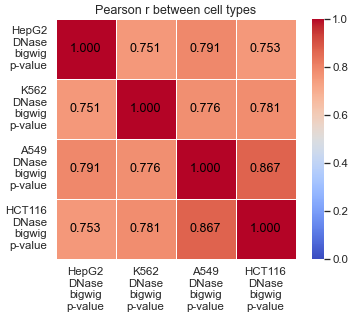

In [21]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[f'{cell_types[i]}_DNase_fold']
        y = df[f'{cell_types[j]}_DNase_fold']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\nbigwig\np-value' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\nbigwig\np-value' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Pearson_DNase_fold.png', dpi=200, bbox_inches='tight')
plt.show()

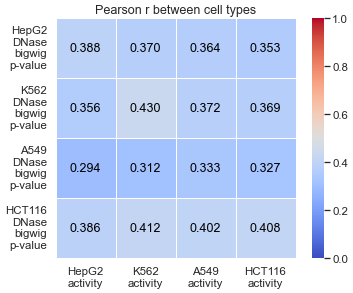

In [30]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[cell_types[i]]
        y = df[f'{cell_types[j]}_DNase_fold']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)


plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=cell_types, rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}_DNase_fold' for cell_type in cell_types], rotation=0)

plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nactivity' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\nbigwig\np-value' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Pearson_DNase_fold_vs_activity.png', dpi=200, bbox_inches='tight')
plt.show()

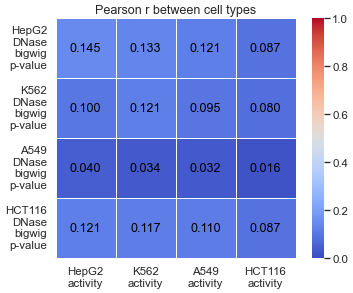

In [31]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[cell_types[i]]
        y = df[f'{cell_types[j]}_DNase_fold']
        # corr_matrix[i][j] = pearson(x, y)
        corr_matrix[i][j] = spearman(x, y)


plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=cell_types, rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}_DNase_fold' for cell_type in cell_types], rotation=0)

plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nactivity' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\nbigwig\np-value' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Spearman_DNase_fold_vs_activity.png', dpi=200, bbox_inches='tight')
plt.show()

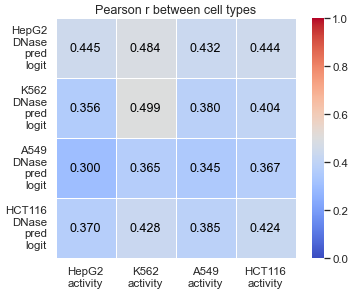

In [28]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[cell_types[i]]
        y = df[f'{cell_types[j]}_DNase_pred_logit']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nactivity' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\npred\nlogit' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Pearson_DNase_pred_vs_activity.png', dpi=200, bbox_inches='tight')
plt.show()

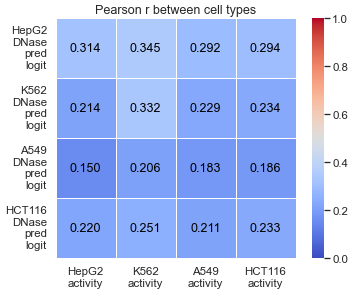

In [29]:
corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = df[cell_types[i]]
        y = df[f'{cell_types[j]}_DNase_pred_logit']
        # corr_matrix[i][j] = pearson(x, y)
        corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            fmt='.3f', square=True, linewidths=1,
            annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nactivity' for cell_type in cell_types], rotation=0)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=[f'{cell_type}\nDNase\npred\nlogit' for cell_type in cell_types], rotation=0)

plt.title('Pearson r between cell types')
plt.savefig('figures/heatmap/Spearman_DNase_pred_vs_activity.png', dpi=200, bbox_inches='tight')
plt.show()

In [19]:
def find_bigwig_file(metadata_df, cell_type, assay, data_dir):
    if assay == 'DNase':
        accession = metadata_df[(metadata_df['Biosample term name'] == cell_type) & (metadata_df['Assay name'] == 'DNase-seq')]['Accession']
    else:
        accession = metadata_df[(metadata_df['Biosample term name'] == cell_type) & (metadata_df['Target of assay'] == assay)]['Accession']

    if len(accession) != 1:
        print(f'Error: {cell_type} {assay} metadata not found')
        return None
    
    accession = accession.values[0]
    files = os.listdir(f'{data_dir}/{accession}')
    # print(f'Accession {accession_id} has {len(files)} file.')
    if len(files) != 1:
        return None
    file = files[0]
    path = f'{data_dir}/{accession}/{file}'
    return path

In [21]:
metadata_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/ENCODE/metadata.csv')
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

for cell_type in cell_types:
    for assay in assays:
        f = find_bigwig_file(metadata_df, cell_type, assay, data_dir='/home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads')
        print(cell_type, assay, f)

HepG2 DNase None
HepG2 H3K4me1 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000APV/ENCFF576YVM.bigWig
HepG2 H3K4me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AMP/ENCFF284FVP.bigWig
HepG2 H3K9me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000ATD/ENCFF754ROM.bigWig
HepG2 H3K27me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AOL/ENCFF529HLC.bigWig
HepG2 H3K27ac /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AMO/ENCFF022TZG.bigWig
HepG2 H3K36me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AMB/ENCFF247LOP.bigWig
HepG2 CTCF /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AMA/ENCFF357NFO.bigWig
K562 DNase None
K562 H3K4me1 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AKS/ENCFF607SUJ.bigWig
K562 H3K4me3 /home/hxcai/cell_type_specific_CRE/data/ENCODE/downloads/ENCSR000AKU/ENCFF660WUG.bigWig
K562 H3K9me3 /home/hxcai/cell_type_specific_CRE/data

In [ ]:
import pyBigWig
import numpy as np
from tqdm import tqdm

def extract_bigwig_signal(df, bigwig_file, window_size=200):
    """
    Extracts mean signal values from a BigWig file for regions centered on 
    positions specified in the DataFrame.

    Parameters:
    df : DataFrame
        A DataFrame containing chromosome ('chr') and position ('hg38_pos') columns.
    bigwig_file : str
        Path to the BigWig file.
    window_size : int, optional
        Half of the window size around the position (default is 100).

    Returns:
    np.ndarray
        An array of mean signal values for each position in the DataFrame.
    """
    mean_signal_values = []
    bw_reader = pyBigWig.open(bigwig_file)
    
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        chromosome = row['chr']
        position = row['hg38_pos']
        start, end = position - window_size//2, position + window_size//2
        
        try:
            signal_values = bw_reader.values(chromosome, start, end)
            mean_signal_values.append(np.mean(signal_values))
        except RuntimeError:
            mean_signal_values.append(np.nan)
    
    bw_reader.close()

    mean_signal_values = np.array(mean_signal_values)
    return mean_signal_values

In [ ]:
MPRA_df = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k.csv')

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        bigwig_file = find_bigwig_file(metadata_df, cell_type, assay)
        print(cell_type, assay, bigwig_file)
        if bigwig_file is not None:
            mean_signal_values = extract_bigwig_signal(MPRA_df, bigwig_file)
            MPRA_df[f'{cell_type}_{assay}_fold'] = mean_signal_values

        else:
            print(f"{cell_type}_{assay} does not have bigwig data")
            MPRA_df[f'{cell_type}_{assay}_fold'] = np.nan

MPRA_df.to_csv('../../data/SirajMPRA/SirajMPRA_281k_fold.csv', index=False)

In [30]:
df_fold = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_fold.csv')
df_pred = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_pred.csv')
df = pd.concat([df_fold, df_pred], axis=1)
df = df.loc[:, ~df.columns.duplicated()]
df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit,flag
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789,True
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042,True
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061,True
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-9.422236,-7.347300,-8.694691,-9.359782,-5.428939,-6.522037,-9.115440,-11.068689,-9.575661,True
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-8.141296,-6.796749,-8.496226,-8.733803,-5.545477,-6.327884,-9.130206,-9.962906,-8.654516,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-6.511399,-6.431361,-7.430185,-8.173793,-5.671370,-6.129188,-8.043088,-9.617792,-7.009111,True
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.056848,-0.772791,-4.967724,-5.641770,-6.566808,-6.260857,-6.482600,-8.868452,-0.263586,True
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-5.489334,-4.034711,-4.979386,-6.015636,-6.284647,-6.169166,-6.730436,-8.404432,-6.365997,True
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767,True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


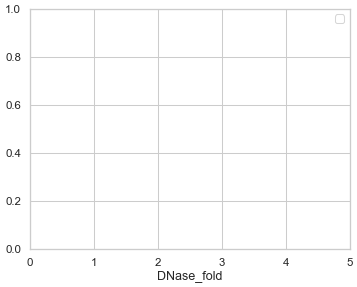

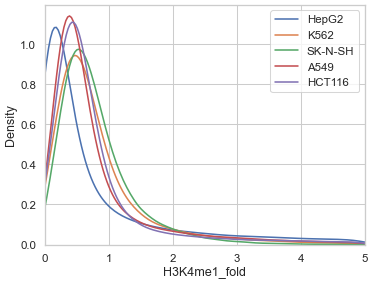

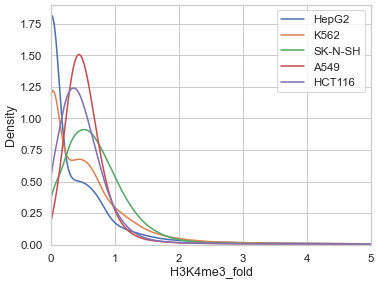

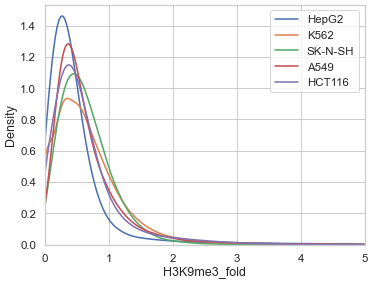

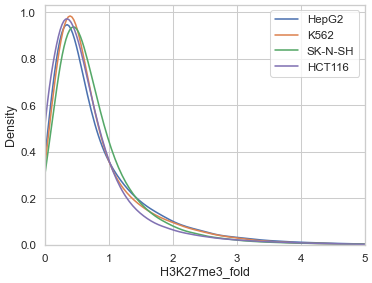

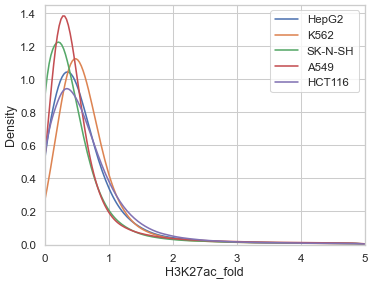

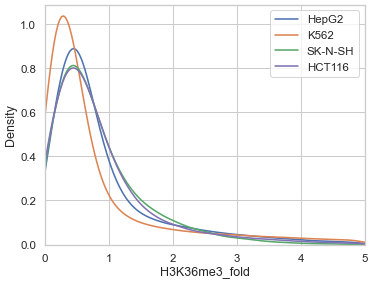

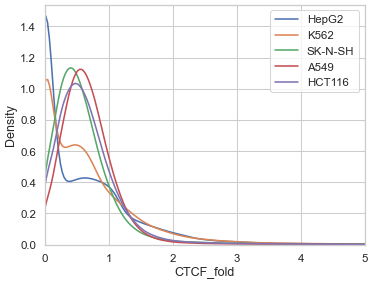

In [33]:
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        if f'{cell_type}_{assay}_fold' in df.columns:
            x = df[f'{cell_type}_{assay}_fold'].copy()
            x = x[x < 5]
            sns.kdeplot(x, label=cell_type, bw_adjust=2)
    plt.xlim(0, 5)
    plt.xlabel(f'{assay}_fold')
    plt.legend()
    plt.savefig(f'figures/kde/{assay}_fold.png', dpi=200)
    plt.show()